#Evaluating Factors Influencing PISA Test Reading Scores
**Problem Statement**:
The PISA (Program for International Student Assessment) dataset provides insight into the
educational performance of 15-year-olds worldwide. This project aims to analyze various
factors influencing students' reading scores. By evaluating demographics, parental
education, school characteristics, and student behavior, we will identify significant predictors
of reading performance. The findings can help educators and policymakers understand how
to improve student outcomes.

Dataset: https://www.kaggle.com/datasets/econdata/pisa-test-scores

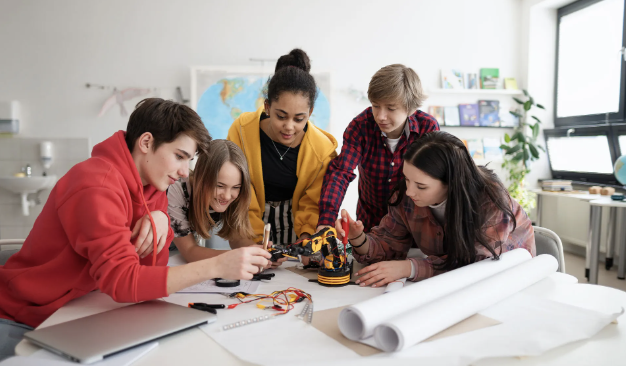

# Data Loading and Preprocessing

## Import the Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs


## Load the Dataset
Import the dataset using pandas

In [4]:
df = pd.read_csv('/content/pisa2009train.csv')
df.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


## Inspect the Dataset
Check for missing values and the data types of the columns.

The dataset has been loaded successfully. It contains 3663 entries and 24 columns. Here's a summary of the data types and missing values:

- Most columns are of type float64, with 'grade' and 'male' being int64, and 'raceeth' being object (likely categorical).
- There are missing values in several columns, with 'fatherBachelors' having the most (569 missing values).

In [5]:

# Display basic information of the data set
print("\n Baisc information of the data set:")
print(df.info()) # Show the data types and missing values

# Summarizes numerical columns
print("\n summarising the numerical columns")
print(df.describe())

# Check for missing values
print('\n Missing Value in each column: ')
print(df.isnull().sum())

# Display data types
print('\n Data Types: ')
print(df.dtypes)




 Baisc information of the data set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  3663 non-null   int64  
 1   male                   3663 non-null   int64  
 2   raceeth                3628 non-null   object 
 3   preschool              3607 non-null   float64
 4   expectBachelors        3601 non-null   float64
 5   motherHS               3566 non-null   float64
 6   motherBachelors        3266 non-null   float64
 7   motherWork             3570 non-null   float64
 8   fatherHS               3418 non-null   float64
 9   fatherBachelors        3094 non-null   float64
 10  fatherWork             3430 non-null   float64
 11  selfBornUS             3594 non-null   float64
 12  motherBornUS           3592 non-null   float64
 13  fatherBornUS           3550 non-null   float64
 14  englishAtHome      

# Handle the missing values:

We can handle missing data: either by filling with appropriate values (mean, median, etc.) or dropping rows/columns.
In this case, we are following the below steps
1. Fill up the missing values in the 'raceeth' column with 'Unknown'
2. In numeric columns with their mean
3. Convert specified columns to categorical data types
4. Verify the changes by printing missing values, data types, and summary statistics.

In [6]:
# Handle Missing Values
df['raceeth'].fillna('Unknown', inplace=True) # In the raceeth column fill up the Nan with 'Unknown'
numeric_columns = df.select_dtypes(include=['float64']).columns # Select all numeric columns with type float64
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean()) # FIll the NaN figures with the mean of the columns

# Convert categorical variables
df['raceeth'] = pd.Categorical(df['raceeth'])
df['male'] = pd.Categorical(df['male'])

# Verify changes
print("Missing values after cleaning:")
print(df.isnull().sum())

print("\
Updated data types:")
print(df.dtypes)

# Display summary statistics
print("\
Summary statistics:")
print(df.describe())

Missing values after cleaning:
grade                    0
male                     0
raceeth                  0
preschool                0
expectBachelors          0
motherHS                 0
motherBachelors          0
motherWork               0
fatherHS                 0
fatherBachelors          0
fatherWork               0
selfBornUS               0
motherBornUS             0
fatherBornUS             0
englishAtHome            0
computerForSchoolwork    0
read30MinsADay           0
minutesPerWeekEnglish    0
studentsInEnglish        0
schoolHasLibrary         0
publicSchool             0
urban                    0
schoolSize               0
readingScore             0
dtype: int64
Updated data types:
grade                       int64
male                     category
raceeth                  category
preschool                 float64
expectBachelors           float64
motherHS                  float64
motherBachelors           float64
motherWork                float64
fatherHS        

<ipython-input-6-f1f5ea44eb81>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['raceeth'].fillna('Unknown', inplace=True) # In the raceeth column fill up the Nan with 'Unknown'


## Data Visualization

1. Box Plot of Reading Scores by Race/Ethnicity: This plot shows the distribution of reading scores across different racial/ethnic groups.

2. Scatter Plot of Reading Scores vs. Minutes per Week Spent on English: This plot illustrates the relationship between time spent on English and reading scores.

3. Box Plot of Reading Scores by Gender: This plot compares reading scores between genders.

Key insights include:

* The mean reading score is approximately 498.
* Asian students have the highest mean reading score, while American Indian/Alaska Native students have the lowest.
* There is a weak positive correlation (0.064) between minutes spent on English and reading scores.
* Female students have a higher mean reading score compared to male students.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


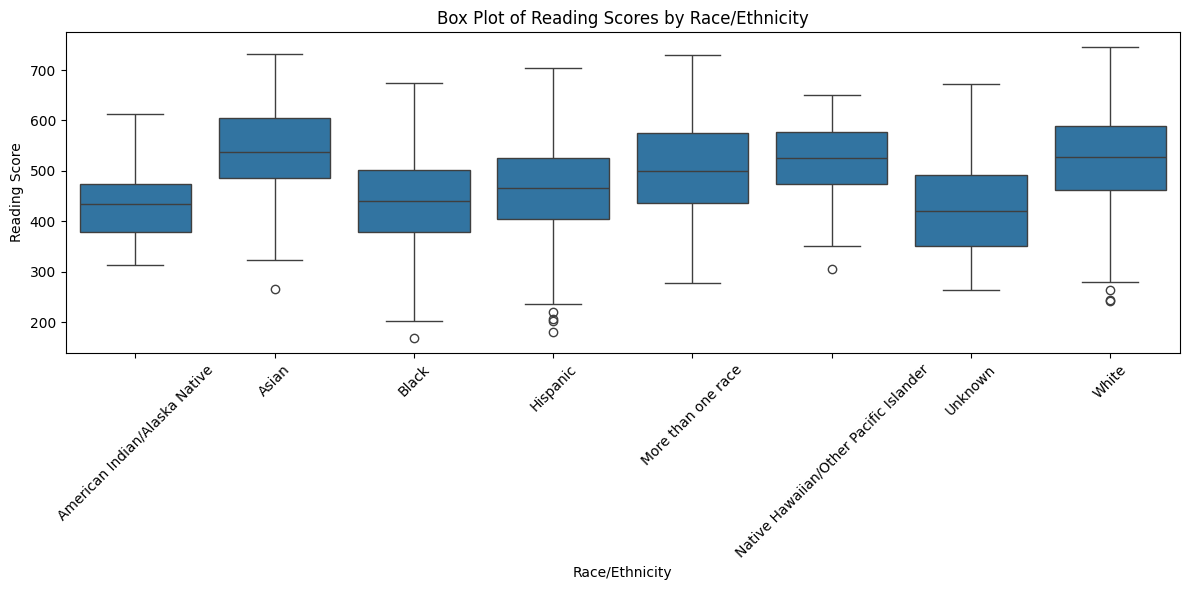

In [ ]:
# 1. Box plot of reading scores by race/ethnicity
plt.figure(figsize=(12, 6))
sbs.boxplot(x='raceeth', y='readingScore', data=df)
plt.title('Box Plot of Reading Scores by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Reading Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('box_plot_reading_scores_by_race.png')
plt.show()
plt.close()

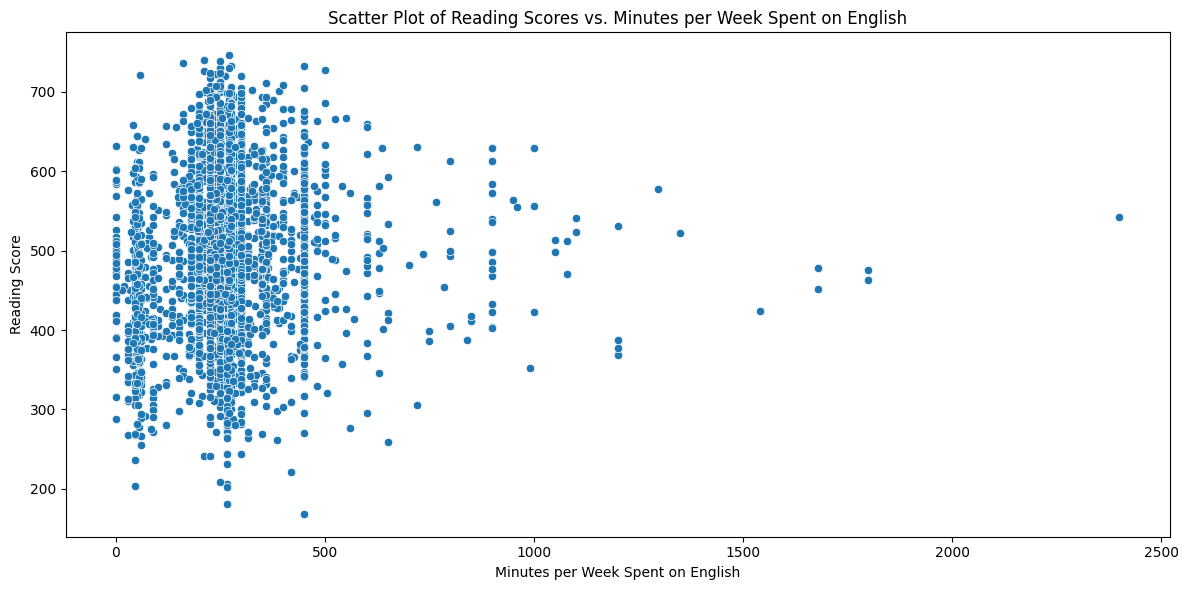

In [ ]:
# 2. Scatter plot of reading scores vs minutes per week spent on English
plt.figure(figsize=(12,6))
sbs.scatterplot(x='minutesPerWeekEnglish', y='readingScore', data=df)
plt.title('Scatter Plot of Reading Scores vs. Minutes per Week Spent on English')
plt.xlabel('Minutes per Week Spent on English')
plt.ylabel('Reading Score')
plt.tight_layout()
plt.savefig('scatter_plot_reading_scores_vs_minutes_per_week.png')
plt.show()
plt.close()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


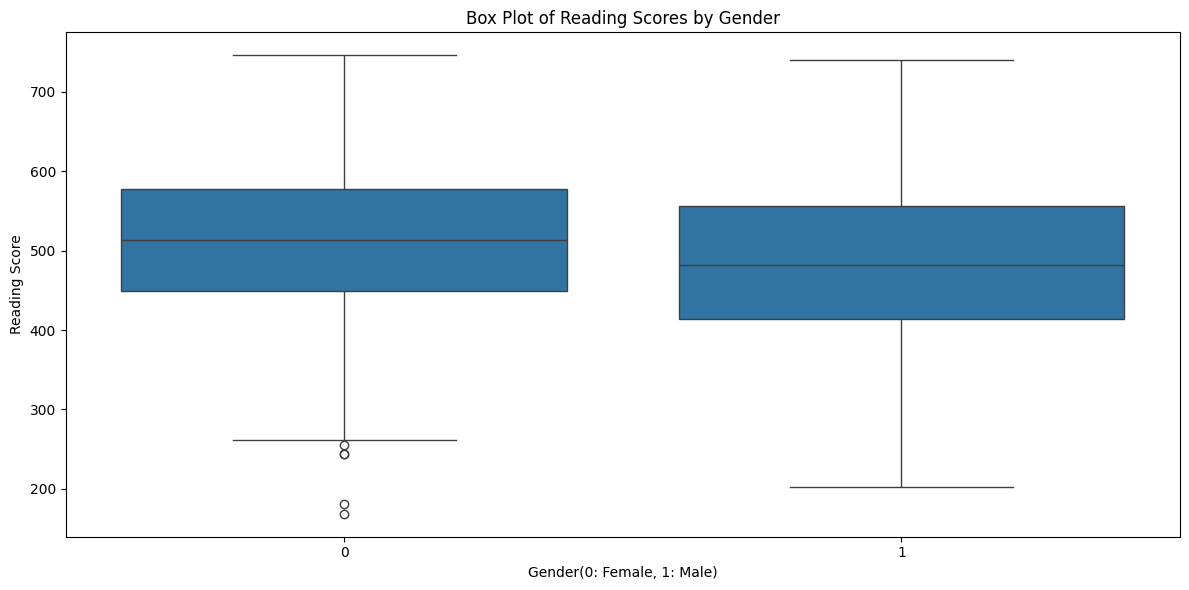

Visualizations have been created and saved as PNG files.


In [ ]:
# 3. Box plot of reading scores by gender
plt.figure(figsize=(12,6))
sbs.boxplot(x='male', y='readingScore', data=df)
plt.title('Box Plot of Reading Scores by Gender')
plt.xlabel('Gender(0: Female, 1: Male)')
plt.ylabel('Reading Score')
plt.tight_layout()
plt.savefig('box_plot_reading_scores_by_gender.png')
plt.show()
plt.close()

print("Visualizations have been created and saved as PNG files.")


# Descriptive Statistics

Use pandas or numpy to compute basic descriptive statistics (mean, median, mode, variance, etc.) for key variables like reading scores or study habits.

In [ ]:
# Calculate some descriptive statistics
print("\
Descriptive Statistics for Reading Scores:")
print(df['readingScore'].describe())

print("\
Mean Reading Score by Race/Ethnicity:")
print(df.groupby('raceeth')['readingScore'].mean().sort_values(ascending=False))

print("\
Correlation between Minutes per Week Spent on English and Reading Score:")
print(df['minutesPerWeekEnglish'].corr(df['readingScore']))

print("\
Mean Reading Score by Gender:")
print(df.groupby('male')['readingScore'].mean())


Descriptive Statistics for Reading Scores:
count    3663.000000
mean      497.911403
std        95.515153
min       168.550000
25%       431.705000
50%       499.660000
75%       566.230000
max       746.000000
Name: readingScore, dtype: float64
Mean Reading Score by Race/Ethnicity:
raceeth
Asian                                     542.952238
White                                     523.859122
Native Hawaiian/Other Pacific Islander    511.366774
More than one race                        498.505161
Hispanic                                  464.601966
Black                                     438.681464
American Indian/Alaska Native             432.688919
Unknown                                   420.058857
Name: readingScore, dtype: float64
Correlation between Minutes per Week Spent on English and Reading Score:
0.06438127809365607
Mean Reading Score by Gender:
male
0    512.940631
1    483.532479
Name: readingScore, dtype: float64


<ipython-input-9-14f9c71c53b7>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('raceeth')['readingScore'].mean().sort_values(ascending=False))
<ipython-input-9-14f9c71c53b7>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('male')['readingScore'].mean())


# 4. Hypothesis Testing


In [ ]:
from scipy import stats
import statsmodels.api as sm

# 4. Hypothesis Testing

# Gender and Reading Scores
male_scores = df[df['male'] == 1]['readingScore']
female_scores = df[df['male'] == 0]['readingScore']
t_stat, p_value = stats.ttest_ind(male_scores, female_scores)

print("4. Hypothesis Testing")
print("T-test for Gender and Reading Scores:")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Parental Education and Reading Scores
high_parent_edu = df[(df['motherBachelors'] == 1) | (df['fatherBachelors'] == 1)]['readingScore']
low_parent_edu = df[(df['motherBachelors'] == 0) & (df['fatherBachelors'] == 0)]['readingScore']
t_stat_edu, p_value_edu = stats.ttest_ind(high_parent_edu, low_parent_edu)

print("\
T-test for Parental Education and Reading Scores:")
print(f"t-statistic: {t_stat_edu}")
print(f"p-value: {p_value_edu}")

4. Hypothesis Testing
T-test for Gender and Reading Scores:
t-statistic: -9.425956203551202
p-value: 7.331466031209069e-21
T-test for Parental Education and Reading Scores:
t-statistic: 13.047045816350463
p-value: 6.147247005262646e-38


# 5. Regression Analysis

In [ ]:
# 5. Regression Analysis
X = df[['male', 'preschool', 'motherBachelors', 'fatherBachelors', 'englishAtHome', 'computerForSchoolwork', 'read30MinsADay']]
y = df['readingScore']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print("\
5. Regression Analysis")
print(model.summary())


5. Regression Analysis
                            OLS Regression Results                            
Dep. Variable:           readingScore   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     103.5
Date:                Wed, 09 Oct 2024   Prob (F-statistic):          1.27e-138
Time:                        12:28:42   Log-Likelihood:                -21566.
No. Observations:                3663   AIC:                         4.315e+04
Df Residuals:                    3655   BIC:                         4.320e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const  

# 6. Confidence Interval

In [ ]:
# 6. Confidence Intervals
conf_int = model.conf_int()
print("\
6. Confidence Intervals for Regression Coefficients")
print(conf_int)

6. Confidence Intervals for Regression Coefficients
                                0           1
const                  405.509680  430.348135
male                   -29.063662  -17.400814
preschool               -8.839669    4.135428
motherBachelors         11.931611   26.650309
fatherBachelors         28.283672   43.562781
englishAtHome           13.472147   30.919395
computerForSchoolwork   37.503641   56.857908
read30MinsADay          38.869117   51.749665
